In [4]:
import pandas as pd
import glob
import re
import numpy as np
from pathlib import Path


In [32]:
path = Path(".") / "bonds" 

bonds = path.glob("*.csv")

In [33]:
l = []
for i, b in enumerate(bonds):
    print(b.stem)
    bond_name = '_'.join(b.stem.split()[0:2])
    temp = pd.read_csv(b, names=['Date', bond_name], usecols=['Date', bond_name], 
                     header = 0, parse_dates=['Date'], index_col='Date')
    l.append(temp)
    
df = pd.concat(l, axis=1)

Eurex Swiss CHF Government Bond Future Historical Data
Euribor Futures Historical Data
Euro BOBL Futures Historical Data
Euro BTP Futures Historical Data
Euro Bund Futures Historical Data
Euro OAT Futures Historical Data
Euro SCHATZ Futures Historical Data
Euro-Buxl Futures Historical Data
Japan Government Bond Futures Historical Data
One-Month EONIA Futures Historical Data
Short Sterling Futures Historical Data
Short-Term Euro-BTP Futures Historical Data
Three-Month Swiss Average Rate Overnight SARON Futures Historical Data
UK Gilt Futures Historical Data
US 10 Year T-Note Futures Historical Data
US 2 Year T-Note Futures Historical Data
US 30 Year T-Bond Futures Historical Data
US 5 Year T-Note Futures Historical Data


In [34]:
df

,Eurex_Swiss,Euribor_Futures,Euro_BOBL,Euro_BTP,Euro_Bund,Euro_OAT,Euro_SCHATZ,Euro-Buxl_Futures,Japan_Government,One-Month_EONIA,Short_Sterling,Short-Term_Euro-BTP,Three-Month_Swiss,UK_Gilt,US_10,US_2,US_30,US_5
Date,,,,,,,,,,,,,,,,,,
2014-01-01,NaN,99.72,124.46,114.78,139.24,NaN,110.295,NaN,143.13,NaN,99.43,NaN,NaN,106.56,NaN,109.91,128.01,119.25
2014-01-02,NaN,99.74,124.41,115.81,139.12,131.55,110.295,121.60,143.26,99.85,99.43,109.42,NaN,106.52,123.22,109.91,128.62,119.41
2014-01-03,143.66,99.74,124.45,116.05,139.09,131.62,110.295,121.40,143.27,99.86,99.43,109.52,NaN,106.60,123.17,109.88,128.53,119.35
2014-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,144.31,99.72,124.61,116.13,139.54,131.88,110.295,121.96,143.54,99.86,99.44,109.46,NaN,107.21,123.47,109.90,129.03,119.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-26,172.49,100.53,135.48,151.40,175.51,170.16,112.355,227.00,152.10,100.47,99.96,114.02,100.72,135.44,138.45,110.41,173.45,125.61
2020-11-27,172.60,100.53,135.49,151.50,175.50,170.13,112.350,227.16,152.05,100.47,99.96,114.02,100.72,135.26,138.55,110.41,173.88,125.67
2020-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.06,NaN,NaN,NaN,NaN,NaN,138.16,110.40,174.95,125.98


In [35]:
df.isna().sum()

Eurex_Swiss             708
Euribor_Futures         124
Euro_BOBL               141
Euro_BTP                142
Euro_Bund               142
Euro_OAT                146
Euro_SCHATZ             142
Euro-Buxl_Futures       125
Japan_Government         83
One-Month_EONIA         141
Short_Sterling          213
Short-Term_Euro-BTP     126
Three-Month_Swiss      1705
UK_Gilt                 154
US_10                    87
US_2                     78
US_30                    82
US_5                     81
dtype: int64

In [36]:
df.drop('Eurex_Swiss', axis=1, inplace=True)
df = df.ffill().bfill()
df.isna().sum()

Euribor_Futures        0
Euro_BOBL              0
Euro_BTP               0
Euro_Bund              0
Euro_OAT               0
Euro_SCHATZ            0
Euro-Buxl_Futures      0
Japan_Government       0
One-Month_EONIA        0
Short_Sterling         0
Short-Term_Euro-BTP    0
Three-Month_Swiss      0
UK_Gilt                0
US_10                  0
US_2                   0
US_30                  0
US_5                   0
dtype: int64

In [37]:
df

,Euribor_Futures,Euro_BOBL,Euro_BTP,Euro_Bund,Euro_OAT,Euro_SCHATZ,Euro-Buxl_Futures,Japan_Government,One-Month_EONIA,Short_Sterling,Short-Term_Euro-BTP,Three-Month_Swiss,UK_Gilt,US_10,US_2,US_30,US_5
Date,,,,,,,,,,,,,,,,,
2014-01-01,99.72,124.46,114.78,139.24,131.55,110.295,121.60,143.13,99.85,99.43,109.42,100.74,106.56,123.22,109.91,128.01,119.25
2014-01-02,99.74,124.41,115.81,139.12,131.55,110.295,121.60,143.26,99.85,99.43,109.42,100.74,106.52,123.22,109.91,128.62,119.41
2014-01-03,99.74,124.45,116.05,139.09,131.62,110.295,121.40,143.27,99.86,99.43,109.52,100.74,106.60,123.17,109.88,128.53,119.35
2014-01-05,99.74,124.45,116.05,139.09,131.62,110.295,121.40,143.27,99.86,99.43,109.52,100.74,106.60,123.17,109.88,128.53,119.35
2014-01-06,99.72,124.61,116.13,139.54,131.88,110.295,121.96,143.54,99.86,99.44,109.46,100.74,107.21,123.47,109.90,129.03,119.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-26,100.53,135.48,151.40,175.51,170.16,112.355,227.00,152.10,100.47,99.96,114.02,100.72,135.44,138.45,110.41,173.45,125.61
2020-11-27,100.53,135.49,151.50,175.50,170.13,112.350,227.16,152.05,100.47,99.96,114.02,100.72,135.26,138.55,110.41,173.88,125.67
2020-11-29,100.53,135.49,151.50,175.50,170.13,112.350,227.16,152.06,100.47,99.96,114.02,100.72,135.26,138.16,110.40,174.95,125.98


In [38]:
df.to_csv('bonds.csv')

## Correlation analysis

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import GraphicalLassoCV
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scaler", StandardScaler()), ("glasso", GraphicalLassoCV())
])
returns = df.apply(np.log).diff().dropna()

In [50]:
pipe.fit(returns.values)
glasso = pipe.steps[-1][-1]

print("alpha_cv = {}".format(glasso.alpha_))

alpha_cv = 0.1960624363928985


In [51]:
cov = glasso.covariance_
cov = pd.DataFrame(cov, index=returns.columns, columns=returns.columns)

In [52]:
import networkx as nx
G = nx.from_pandas_adjacency(cov)

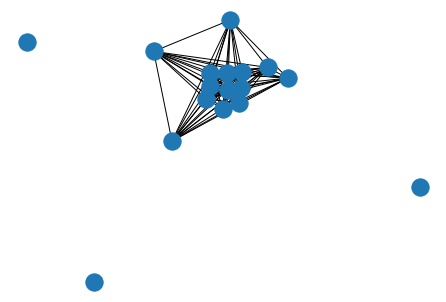

In [53]:
nx.draw(G)

,Euribor_Futures,Euro_BOBL,Euro_BTP,Euro_Bund,Euro_OAT,Euro_SCHATZ,Euro-Buxl_Futures,Japan_Government,One-Month_EONIA,Short_Sterling,Short-Term_Euro-BTP,Three-Month_Swiss,UK_Gilt,US_10,US_2,US_30,US_5
Euribor_Futures,1.000000,0.018791,0.001712,0.015222,0.007735,0.040712,0.012853,0.000776,0.0,0.0,0.000750,0.0,0.007619,0.006995,0.000283,0.006187,0.005159
Euro_BOBL,0.018791,1.000000,0.059491,0.591675,0.268477,0.461541,0.402688,0.024320,0.0,0.0,0.026045,0.0,0.261197,0.211300,0.008677,0.193040,0.158080
Euro_BTP,0.001712,0.059491,1.000000,0.096839,0.222033,0.042113,0.099729,0.006023,0.0,0.0,0.437795,0.0,0.064362,0.050164,0.002050,0.047705,0.037380
Euro_Bund,0.015222,0.591675,0.096839,1.000000,0.436680,0.373901,0.626766,0.037853,0.0,0.0,0.042396,0.0,0.423273,0.330507,0.013631,0.303974,0.248315
Euro_OAT,0.007735,0.268477,0.222033,0.436680,1.000000,0.189997,0.449576,0.027152,0.0,0.0,0.097205,0.0,0.290197,0.226414,0.009260,0.215229,0.168695
Euro_SCHATZ,0.040712,0.461541,0.042113,0.373901,0.189997,1.000000,0.315698,0.019066,0.0,0.0,0.018437,0.0,0.187133,0.171810,0.006955,0.151955,0.126708
Euro-Buxl_Futures,0.012853,0.402688,0.099729,0.626766,0.449576,0.315698,1.000000,0.060394,0.0,0.0,0.043661,0.0,0.444839,0.361304,0.014856,0.357838,0.270617
Japan_Government,0.000776,0.024320,0.006023,0.037853,0.027152,0.019066,0.060394,1.000000,0.0,0.0,0.002637,0.0,0.026866,0.021821,0.000897,0.021611,0.016344
One-Month_EONIA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Short_Sterling,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
